## PHYS 105A:  Introduction to Scientific Computing

# Minimization or Maximization

Chi-kwan Chan

## Problem Definition

* The learned about root finding last time.  This week we will learn a related topic: minimization and maximization of functions.

* The problem is similar, given a function $f(x)$, where $x$ may be a vector, we want to solve for the value of $x$ such that $f(x)$ is locally or globally a minimum or maximum.

* This seemingly simple problem turns out to be EXTREMELY powerful!

## Applications

* In theoretical physics, the *Action Principle* states that: the path taken by the system is the one for which the action is stationary (no change) to first order.

  ![](https://upload.wikimedia.org/wikipedia/commons/1/1c/Least_action_principle.svg)
  
* In experimental physics, the *measured values* of your experiement are the solution to [maximize a likelyhood function](https://github.com/uarizona-2021spring-phys105a/phys105a/blob/main/06/dataproc.ipynb).
  
* In Very-Long-Baseline Interferometry, the [images you saw](https://eventhorizontelescope.org/blog/astronomers-image-magnetic-fields-edge-m87s-black-hole) are the maximum entropy images that fit the data.
  
* In most of the production ready [machine learning applications](https://playground.tensorflow.org/), the machine learning models are also mimimal solutions of some loss function.

## Optimization

* In general, minimizing or maximizing a funciton falls into a field of mathematics called optimization.

* Because so many problems can be casted into a optimization, it is an extremely field with lots of applications.

## Methods

* For one-dimension minimization problems, there are two major classes of methods:

  * Methods that require only evaluation of the function
  
  * Methods that require also evaluations of the derivative of the function.
  
* The first class of method is similar to the bisection method we learned last week for root finding.  The second class of methods is similar to the Newton Raphson method that we skipped last time.

* For multivariable problems, there is one more class of methods that you can compute the derivatives using finite difference.

* Unlike root finding, methods that require derivatives is easier to understand, so we will learn them in this lecture.

## Graphical Search for Extrema

* Just like looking for roots, it is always a good idea to plot a function.

* We already know how to plot functions in python

* In fact, let's use the same polynomial we used last time.

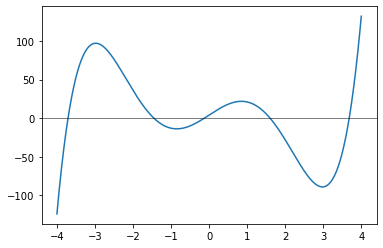

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def h(x):
    return x**5 - 16*x**3 + 32*x + 4

x = np.linspace(-4, 4, 8001)
plt.plot(x, h(x))
plt.axhline(y=0, color='k', lw=0.5)

# The extrema are at:
# Global minimum: -4
# Global maximum: +4
# Local minima: ≈ -1, -3
# Local maxima: ≈ 3, 1

## Gradient Descent Method

* There are many methods for solving the minimum once we have the derivative.

* They have different speed and complexity.  One of the simplest but easiest to implment is gradient descent.

* The idea is very simple:

  * Evaluate the function's derivative at a given point.
  
  * Step toward the "downhill" direction.
  
  * Repeat until the derivative is small enough that you are near a minimum.

In [2]:
def minimize(f, f_x, x, alpha, acc=1e-3, nmax=1000):
    for _ in range(nmax):
        y   = f(x)
        y_x = f_x(x)
        if abs(y_x) <= acc:
            return x         
        x -= alpha * y_x
            
    raise Exception("Too many iterations")

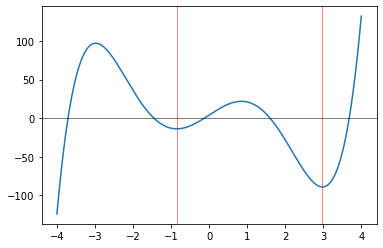

In [3]:
# Let's test it

#def h(x):
#    return x**5 - 16*x**3 + 32*x + 4

def h_x(x):
    return 5 * x**4 - 48 * x**2 + 32
    
m0 = minimize(h, h_x, 0, 1e-3)
m1 = minimize(h, h_x, 2, 1e-3)

x = np.linspace(-4, 4, 8001)
plt.plot(x, h(x))
plt.axhline(y=0,  color='k', lw=0.5)
plt.axvline(x=m0, color='r', lw=0.5)
plt.axvline(x=m1, color='r', lw=0.5)

In [4]:
# Finding maximum is also easy

def maximize(f, f_x, x, alpha, **kwargs):
    def nf(x):
        return -f(x)
    def nf_x(x):
        return -h_x(x)
    return minimize(nf, nf_x, x, alpha, **kwargs)

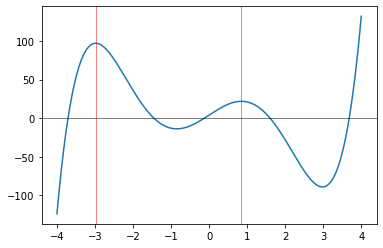

In [5]:
# Let's also test it

M0 = maximize(h, h_x, -2, 1e-3)
M1 = maximize(h, h_x,  0, 1e-3)

x = np.linspace(-4, 4, 8001)
plt.plot(x, h(x))
plt.axhline(y=0,  color='k', lw=0.5)
plt.axvline(x=M0, color='r', lw=0.5)
plt.axvline(x=M1, color='r', lw=0.5)

## How Good is our Optimizer?

* Within an hour, we implemented a gradient descent method.  This is AWESOME because we can now solve some problem that even the greatest mathematicians cannot solve!

* However, this is too good to be true.  While gradient descent is a generic enough method, there are many traps that we may fall into that break our optimizer.

* Instead of learning a more complicated optimization algorithm, let's try to break our gradient descent method and then fix it.

In [6]:
# We use 1e-3 as the step size; what if we change it to a larger step?

m1 = minimize(h, h_x, 2, 1e-2)

Exception: Too many iterations

In [7]:
# What's going on?
# To understand why the algorithm breaks, let's modify our
# gradient descent method output more information.

def minimize(f, f_x, x, alpha, acc=1e-3, nmax=1000):
    l = np.array([x])
    for _ in range(nmax):
        y   = f(x)
        y_x = f_x(x)
        if abs(y_x) <= acc:
            return l
        x -= alpha * y_x
        l = np.append(l, x)
            
    raise Exception("Too many iterations", l)

In [8]:
try:
    l1 = minimize(h, h_x, 2, 1e-2)
except Exception as e:
    print('Failed')
    l1 = e.args[1]
    
print(l1)

Failed
[2.         2.8        3.16992    ... 3.2242049  2.49072544 3.2242049 ]


(-100.0, -50.0)

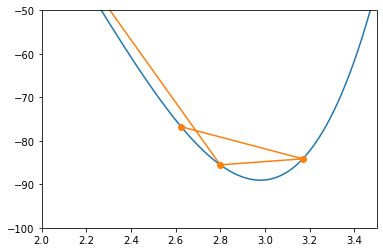

In [9]:
n = 4
    
x = np.linspace(-4, 4, 8001)
plt.plot(x, h(x))
plt.plot(l1[:n], h(l1[:n]), 'o-')
plt.axhline(y=0,  color='k', lw=0.5)
plt.xlim(2, 3.5)
plt.ylim(-100, -50)

## Take Away

* For simpmle gradient descent, the step size is important.

* If a step is too big, you may end up jump around the extrema without reaching the accuracy requirements.

* Adjusting the step size to reach a fast and accurate convergence is all *hyperparameter tuning*.

* There are many algorithms to automatically adjust the step size.

* However, for this course, we may simply adjust the step size by visually inspecting the results.

## Moving on to Multidimensional Problems

* Because gradient descent is so simple, we can trivially generalize it to multiple variables.

* This will enables to solve much more intereting questions including curve fittings, or even physics problems that uses the action principle.

* The basic idea is that, in stead of moving left or right in one dimension, the vector of derivatives gives you the gradient of the function.

* For simplicity, we will move one direction at a time.

In [10]:
# Let's implement a two-dimension minimizer

def minimize(f, f_x, f_y, x, y, alpha, acc=1e-3, nmax=1000):
    l = np.array([[x, y]])
    print(l.shape)
    for i in range(nmax):
        z   = f(x, y)
        z_x = f_x(x, y)
        z_y = f_y(x, y)
        if z_x*z_x + z_y*z_y <= acc * acc:
            return l
        if i % 2 == 0:
            x -= alpha * z_x
        else:
            y -= alpha * z_y
        l = np.vstack((l, [x, y]))
            
    raise Exception("Too many iterations", l)

(1, 2)
[1.99958462 0.99974039]


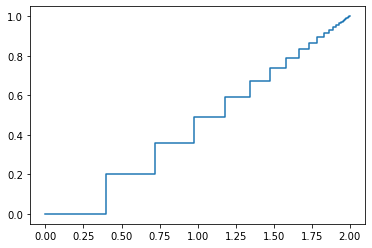

In [11]:
# Test our implementation

def g(x, y):
    return (x - 2)**2 + (y - 1)**2

def g_x(x, y):
    return 2 * (x - 2)

def g_y(x, y):
    return 2 * (y - 1)

l1 = minimize(g, g_x, g_y, 0, 0, 0.1)
    
print(l1[-1,:])
plt.plot(l1[:,0], l1[:,1])

## Summary

* Optimization finding is an important field in mathematics with many applications!

* Numerical optimizers can help us find extrema of functions complicated.

* The gradient descent method is extremely simple but powerful!